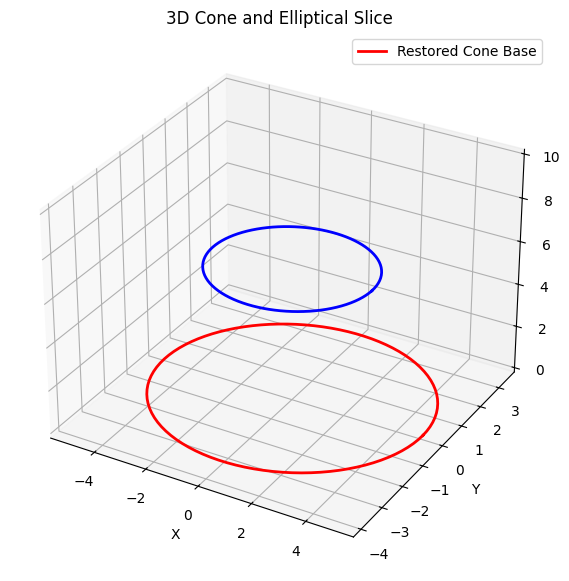

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to create a cone in 3D
def draw_cone(radius, height, num_points=100):
    # Parametric equations for a cone
    theta = np.linspace(0, 2 * np.pi, num_points)
    z = np.linspace(0, height, num_points)
    r = np.linspace(0, radius, num_points)
    
    # Cartesian coordinates of the cone
    X = r * np.cos(theta)
    Y = r * np.sin(theta)
    Z = np.repeat(z, num_points).reshape(num_points, num_points).T

    return X, Y, Z

# Function to draw an elliptical slice
def draw_ellipse_slice(radius_x, radius_y, height, num_points=100):
    # Parametric equation for an ellipse at a specific height
    theta = np.linspace(0, 2 * np.pi, num_points)
    X = radius_x * np.cos(theta)
    Y = radius_y * np.sin(theta)
    Z = np.full_like(X, height)  # Keep Z constant at the slice height
    
    return X, Y, Z

# Function to restore the base radius from an ellipse at a given height
def restore_cone_base(ellipse_radius_x, ellipse_radius_y, height, cone_height):
    # The relationship between the radius and the height is linear
    # ratio of radius at slice height to the full base radius
    scale_factor = cone_height / height
    base_radius_x = ellipse_radius_x * scale_factor
    base_radius_y = ellipse_radius_y * scale_factor
    
    return base_radius_x, base_radius_y

# Create the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Draw the cone with radius 5 and height 10
cone_radius = 5
cone_height = 10
X_cone, Y_cone, Z_cone = draw_cone(cone_radius, cone_height)

# Draw an elliptical slice at height 6
slice_height = 6
ellipse_radius_x = 3  # Horizontal radius at the slice height
ellipse_radius_y = 2  # Vertical radius at the slice height
X_slice, Y_slice, Z_slice = draw_ellipse_slice(ellipse_radius_x, ellipse_radius_y, slice_height)

# Restore the base radius from the elliptical slice
base_radius_x, base_radius_y = restore_cone_base(ellipse_radius_x, ellipse_radius_y, slice_height, cone_height)

# Plot the cone
ax.plot_surface(X_cone, Y_cone, Z_cone, color='orange', alpha=0.6)

# Plot the elliptical slice
ax.plot(X_slice, Y_slice, Z_slice, color='b', lw=2)

# Plot restored base (the full base of the cone)
theta = np.linspace(0, 2 * np.pi, 100)
X_base = base_radius_x * np.cos(theta)
Y_base = base_radius_y * np.sin(theta)
Z_base = np.zeros_like(X_base)
ax.plot(X_base, Y_base, Z_base, color='r', lw=2, label="Restored Cone Base")

# Labels and plot formatting
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Cone and Elliptical Slice')

# Display the plot
plt.legend()
plt.show()


RuntimeError: x must be a sequence

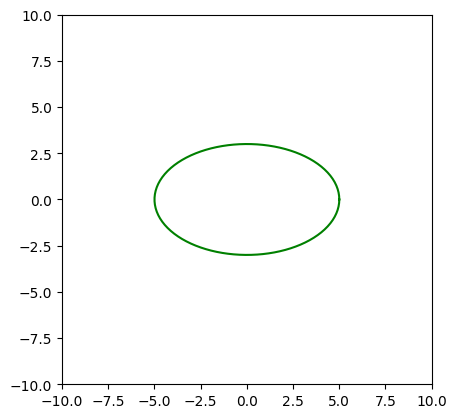

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters for the ellipse
a, b = 5, 3  # Semi-major and semi-minor axes
num_frames = 100  # Number of frames for the animation
center = (0.0, 0.0)  # Center of the ellipse

# Function to calculate ellipse foci
def calculate_foci(a, b, center):
    c = np.sqrt(a**2 - b**2)  # Distance from center to foci
    return (center[0] - c, center[1]), (center[0] + c, center[1])

# Function to calculate parametric points on the ellipse
def ellipse_parametric(theta, a, b, center):
    x = center[0] + a * np.cos(theta)
    y = center[1] + b * np.sin(theta)
    return x, y

# Update foci positions for each frame (example: oscillating offset)
def update_foci(frame):
    # Oscillating foci: moving left and right on the x-axis
    offset = 2 * float(np.sin(2 * np.pi * frame / num_frames))
    return (center[0] - offset, center[1]), (center[0] + offset, center[1])

# Animation update function
def animate(frame):
    # Update foci positions
    new_foci = update_foci(frame)
    f1.set_data(*new_foci[0])
    f2.set_data(*new_foci[1])
    
    # Update ellipse with changing foci
    foci = new_foci  # The new foci positions for the current frame
    c = np.sqrt(a**2 - b**2)  # Calculate the distance from the center to the foci
    # Moving point on the ellipse based on the parametric equation
    t = 2 * np.pi * frame / num_frames
    px = center[0] + a * np.cos(t)
    py = center[1] + b * np.sin(t)
    
    point.set_data([px], [py])  # Set the position of the point
    return f1, f2, point

# Initialize plot
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-a * 2, a * 2)
ax.set_ylim(-a * 2, a * 2)

# Initial foci positions
foci = calculate_foci(a, b, center)
f1, = ax.plot([], [], 'ro', label="Focus 1")
f2, = ax.plot([], [], 'bo', label="Focus 2")

# Ellipse curve (for reference)
theta = np.linspace(0, 2 * np.pi, 100)
x, y = ellipse_parametric(theta, a, b, center)
ellipse, = ax.plot(x, y, 'g-', label="Ellipse")

# Point moving on the ellipse
point, = ax.plot([], [], 'ko', label="Moving Point")

# Animation
ani = FuncAnimation(fig, animate, frames=num_frames, interval=50, blit=True)

# Add legend and show plot
ax.legend()
plt.show()


-3.0 3.0
1.5707963267948966
3.6739403974420594e-16 3.0
-3.0 5.51091059616309e-16
-9.0 6.0


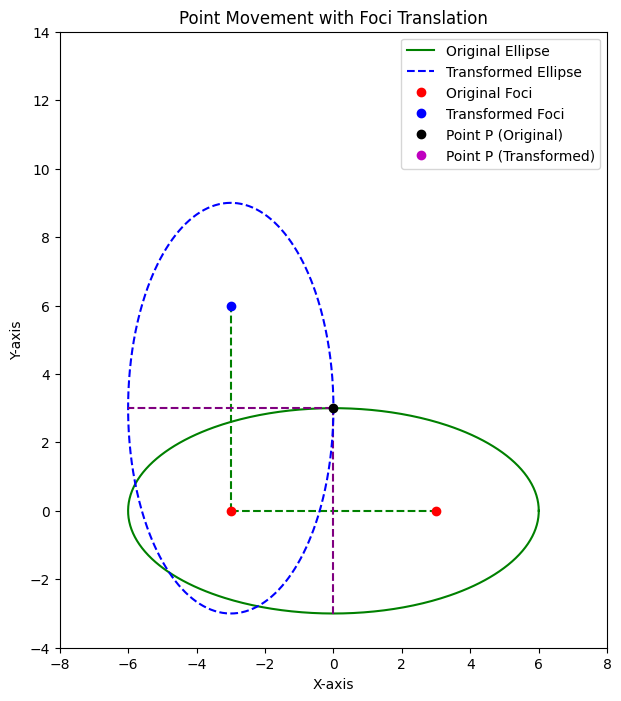

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Ellipse parameters
a = 6  # Semi-major axis
b = 3  # Semi-minor axis
x1, y1 = -3, 0  # F1 (fixed focus)
x2, y2 = 3, 0  # F2 (movable focus)

# Moving F2 parameters
delta_x = -6
delta_y = 6

# Function to calculate the semi-major and semi-minor axes
def calculate_axes(F1, F2, a):
    c = np.sqrt((F2[0] - F1[0])**2 + (F2[1] - F1[1])**2) / 2  # Distance between foci divided by 2
    b = np.sqrt(a**2 - c**2)  # Semi-minor axis
    return a, b

def rotate_points(x, y, angle, center):
    x_rot = (x - center[0]) * np.cos(angle) - (y - center[1]) * np.sin(angle) + center[0]
    y_rot = (x - center[0]) * np.sin(angle) + (y - center[1]) * np.cos(angle) + center[1]
    return x_rot, y_rot


# Function to draw the ellipse and its axes
def plot_ellipse(F1, F2, a, ax, label=None, color='blue'):
    # Calculate the ellipse's center
    center = ((F1[0] + F2[0]) / 2, (F1[1] + F2[1]) / 2)
    #a, b = calculate_axes(F1, F2, a)
    
    # Parametric equations for the ellipse
    theta = np.linspace(0, 2 * np.pi, 500)
    angle = np.arctan2(F2[1] - F1[1], F2[0] - F1[0])
    x = center[0] + a * np.cos(theta)
    y = center[1] + b * np.sin(theta)
    ellipse_x, ellipse_y = rotate_points(x, y, angle, center)
    
    # Plot the ellipse
    ax.plot(ellipse_x, ellipse_y, color, label=label)
    
    # Plot the semi-major axis
    ax.plot([F1[0], F2[0]], [F1[1], F2[1]], color='green', linestyle='--')
    
    # Plot the semi-minor axis
    dx, dy = F2[0] - F1[0], F2[1] - F1[1]
    midpoint = center
    perp_dx, perp_dy = -dy / np.sqrt(dx**2 + dy**2), dx / np.sqrt(dx**2 + dy**2)
    minor_x = [midpoint[0] - b * perp_dx, midpoint[0] + b * perp_dx]
    minor_y = [midpoint[1] - b * perp_dy, midpoint[1] + b * perp_dy]
    ax.plot(minor_x, minor_y, color='purple', linestyle='--')

    

# Function to calculate new point P after affine transformation
def affine_transform(x, y, f1, f2_old, f2_new):
    x1, y1 = f1
    x2_old, y2_old = f2_old
    x2_new, y2_new = f2_new

    # Calculate translation components
    delta_x = x2_new - x2_old
    delta_y = y2_new - y2_old
    t_x = 0.5 * delta_x
    t_y = 0.5 * delta_y
    
    print(t_x, t_y)

    # Calculate rotation angles
    angle_old = np.arctan2(y2_old - y1, x2_old - x1)
    angle_new = np.arctan2(y2_new - y1, x2_new - x1)
    angle_change = angle_new - angle_old
    print(angle_change)

    # Translate to origin for rotation
    x_rel = x - (x1 + x2_old) / 2
    y_rel = y - (y1 + y2_old) / 2
    print(x_rel, y_rel)
    
    # Apply rotation
    x_rot = x_rel * np.cos(angle_change) - y_rel * np.sin(angle_change)
    y_rot = x_rel * np.sin(angle_change) + y_rel * np.cos(angle_change)
    print(x_rot, y_rot)
    # Translate back and apply affine translation
    x_new = x_rot + (x1 + x2_new) / 2 + t_x
    y_new = y_rot + (y1 + y2_new) / 2 + t_y
    return x_new, y_new


# Visualize the original ellipse, transformed ellipse, and point movement
fig, ax = plt.subplots(figsize=(8, 8))

# Plot original ellipse
plot_ellipse((x1,y1),(x2,y2),a,ax,color='g-', label="Original Ellipse")

# Plot transformed ellipse
x2_new, y2_new = x2 + delta_x, y2 + delta_y
plot_ellipse((x1,y1),(x2_new,y2_new),a,ax,color='b--', label="Transformed Ellipse")

# Plot foci positions
ax.plot([x1, x2], [y1, y2], 'ro', label="Original Foci")
ax.plot([x2_new], [y2_new], 'bo', label="Transformed Foci")

# Track a point P on the ellipse curve
theta_p = np.pi / 2  # Angle for point P on the ellipse
P_x = x_center + a * np.cos(theta_p)
P_y = y_center + b * np.sin(theta_p)
P = (P_x, P_y)

# Transform point P
P_new_x, P_new_y = affine_transform(P_x, P_y, (x1, y1), (x2, y2), (x2_new, y2_new))

T, t = compute_affine_transformation(p1, p2, q, a)

# Example points on E1
points = np.array([[P_x, P_y]])

# Apply transformation
transformed_points = apply_transformation(T, t, points)

#P_new_x, P_new_y = transformed_points[0]
P_new = (P_new_x, P_new_y)
print(P_new_x, P_new_y)
# Plot point P
ax.plot(*P, 'ko', label="Point P (Original)")
ax.plot(*P_new, 'mo', label="Point P (Transformed)")

# Annotate
ax.set_aspect('equal')
ax.set_xlim(-8, 8)
ax.set_ylim(-4, 14)
ax.set_title("Point Movement with Foci Translation")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

ax.legend()
plt.show()


In [52]:
import numpy as np


def perpendicular(v):
    """Returns a vector perpendicular to the input vector v."""
    return np.array([-v[1], v[0]])


def unit_vector(v):
    """Returns the unit vector of the input vector v."""
    return v / np.linalg.norm(v)


def compute_scaling_factor(a, k, k_prime):
    """Computes the scaling factor for the transformation."""
    b = np.sqrt(a**2 - (k / 2)**2)  # Minor semi-axis of E1
    b_prime = np.sqrt(a**2 - (k_prime / 2)**2)  # Minor semi-axis of E2
    return b_prime / b


def compute_affine_transformation(p1, p2, q, a):
    """
    Computes the affine transformation matrix and translation vector.
    
    Parameters:
    - p1, p2: Foci of ellipse E1
    - q: New focus for ellipse E2
    - a: Major semi-axis length of both ellipses

    Returns:
    - T: Affine transformation matrix
    - t: Translation vector
    """
    # Compute basis for E1
    u = unit_vector(p2 - p1)
    v = perpendicular(u)

    # Compute basis for E2
    r = unit_vector(q - p1)
    s = perpendicular(r)

    # Compute scaling factor
    k = np.linalg.norm(p2 - p1)
    k_prime = np.linalg.norm(q - p1)
    h = compute_scaling_factor(a, k, k_prime)

    # Compute the transformation matrix
    R = np.column_stack((r, s))  # New basis
    U = np.column_stack((u, v))  # Old basis
    S = np.diag([1, h])  # Scaling along major and minor axes
    T = R @ S @ U.T  # Combined transformation matrix

    # Compute translation vector
    t = p1  # The center remains the same in this case

    return T, t


def apply_transformation(T, t, points):
    """Applies the affine transformation to a set of points."""
    transformed_points = (T @ points.T).T + t
    return transformed_points


# Example usage
if __name__ == "__main__":
    # Define parameters
    p1 = np.array([-3, 0])
    p2 = np.array([3, 0])
    q = np.array([4, 2])  # New focus for E2
    a = 6  # Major semi-axis length (2a = 12)

    # Compute transformation
    T, t = compute_affine_transformation(p1, p2, q, a)

    # Example points on E1
    points = np.array([
        [-3, 0], [0, 0], [3, 0], [0, 2], [-3, 2]
    ])

    # Apply transformation
    transformed_points = apply_transformation(T, t, points)

    # Print results
    print("Affine Transformation Matrix (T):\n", T)
    print("Translation Vector (t):", t)
    print("Transformed Points:\n", transformed_points)


Affine Transformation Matrix (T):
 [[ 0.96152395 -0.25217433]
 [ 0.27472113  0.88261016]]
Translation Vector (t): [-3  0]
Transformed Points:
 [[-5.88457184 -0.82416338]
 [-3.          0.        ]
 [-0.11542816  0.82416338]
 [-3.50434866  1.76522032]
 [-6.38892051  0.94105694]]


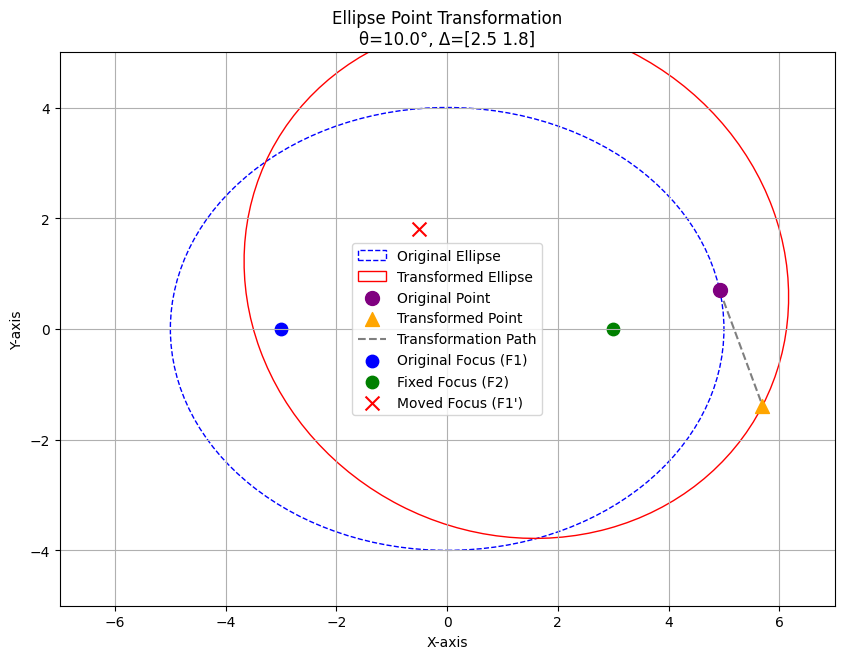

Transformation error: 0.00e+00


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.optimize import root

# Original ellipse parameters
a = 5               # Semi-major axis (constant)
original_c = 3      # Original distance from center to focus
original_b = np.sqrt(a**2 - original_c**2)

# Original foci positions
F1_original = np.array([-original_c, 0])
F2 = np.array([original_c, 0])

# Select a point on original ellipse using parametric angle
theta = np.radians(10)  # Try different angles (0-360)
P_original = np.array([a*np.cos(theta), original_b*np.sin(theta)])

# Displacement for F1 (try different values)
delta = np.array([2.5, 1.8])
F1_new = F1_original + delta

# Calculate new ellipse parameters
focus_vector = F2 - F1_new
c_prime = np.linalg.norm(focus_vector)/2
valid_ellipse = c_prime < a
b_prime = np.sqrt(a**2 - c_prime**2) if valid_ellipse else 0
center_new = (F1_new + F2)/2
rotation_angle = np.arctan2(focus_vector[1], focus_vector[0])

# Find transformed point on new ellipse
def equations(vars):
    x, y = vars
    return [np.linalg.norm([x-F1_new[0], y-F1_new[1]]) + 
            np.linalg.norm([x-F2[0], y-F2[1]]) - 2*a,
            (x - center_new[0])*np.sin(rotation_angle) - 
            (y - center_new[1])*np.cos(rotation_angle)]  # Maintain angular position

solution = root(equations, P_original, method='lm')
P_transformed = solution.x if valid_ellipse else np.array([np.nan, np.nan])

# Create plot
fig, ax = plt.subplots(figsize=(10, 8))

# Original ellipse (blue dashed)
ax.add_patch(Ellipse(
    xy=(0, 0), width=2*a, height=2*original_b, angle=0,
    edgecolor='blue', linestyle='--', fill=False, label='Original Ellipse'
))

# New ellipse (red solid) if valid
if valid_ellipse:
    ax.add_patch(Ellipse(
        xy=center_new, width=2*a, height=2*b_prime, 
        angle=np.degrees(rotation_angle),
        edgecolor='red', linestyle='-', fill=False, 
        label='Transformed Ellipse'
    ))

# Plot points and connections
ax.scatter(*P_original, c='purple', s=100, 
          label='Original Point', zorder=3)
if valid_ellipse:
    ax.scatter(*P_transformed, c='orange', s=100, marker='^', 
              label='Transformed Point', zorder=3)
    ax.plot([P_original[0], P_transformed[0]], 
            [P_original[1], P_transformed[1]], 
            'k--', alpha=0.5, label='Transformation Path')

# Plot foci and annotations
ax.scatter(*F1_original, c='blue', s=80, label='Original Focus (F1)')
ax.scatter(*F2, c='green', s=80, label='Fixed Focus (F2)')
ax.scatter(*F1_new, c='red', marker='x', s=100, label='Moved Focus (F1\')')

# Configuration
ax.set_aspect('equal')
ax.set_xlim(-7, 7)
ax.set_ylim(-5, 5)
ax.grid(True)
ax.legend()
plt.title(f'Ellipse Point Transformation\nθ={np.degrees(theta):.1f}°, Δ={delta}')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# Verify solution accuracy
if valid_ellipse:
    error = np.linalg.norm(P_transformed-F1_new) + np.linalg.norm(P_transformed-F2) - 2*a
    print(f"Transformation error: {error:.2e}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 2534.62it/s]


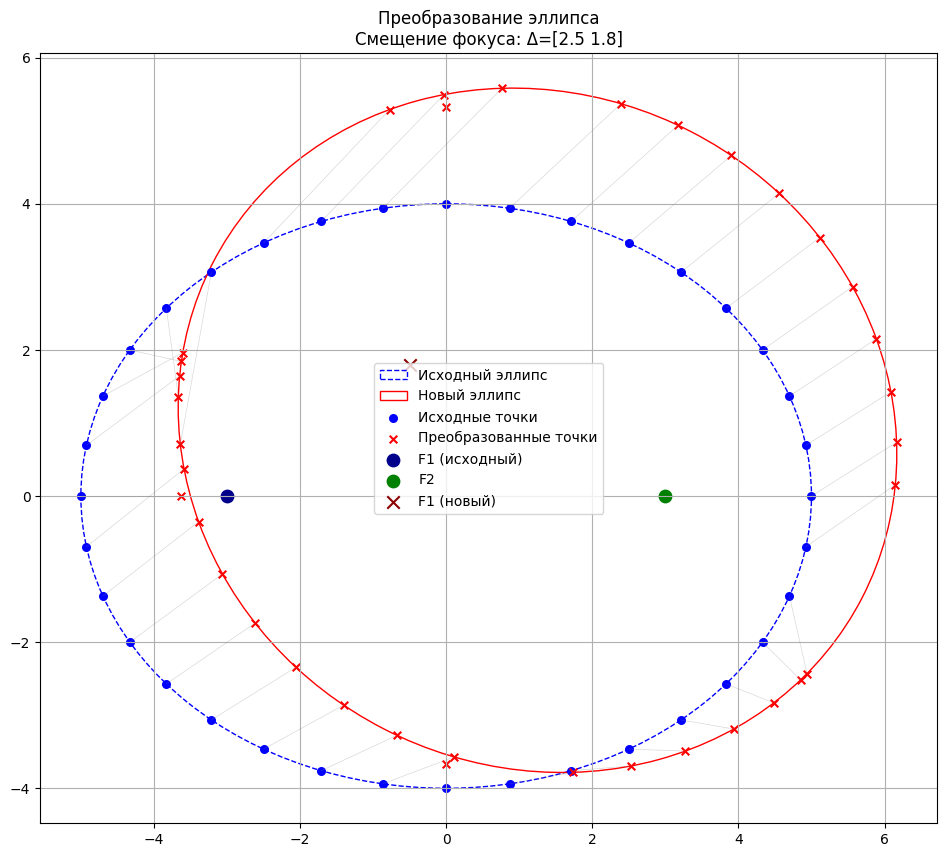

Максимальная ошибка: 3.21e-01
Средняя ошибка: 2.19e-02


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.optimize import root
from tqdm import tqdm

# Конфигурация
a = 5               # Большая полуось
original_c = 3      # Исходное расстояние до фокуса
delta = np.array([2.5, 1.8])  # Смещение фокуса

# Рассчитываем исходный эллипс
F1_original = np.array([-original_c, 0])
F2 = np.array([original_c, 0])
original_b = np.sqrt(a**2 - original_c**2)

# Генерируем 36 точек через каждые 10°
angles = np.radians(np.arange(0, 360, 10))
P_original = np.array([a*np.cos(angles), original_b*np.sin(angles)]).T

# Вычисляем параметры нового эллипса
F1_new = F1_original + delta
focus_vector = F2 - F1_new
c_prime = np.linalg.norm(focus_vector)/2
valid = c_prime < a
b_prime = np.sqrt(a**2 - c_prime**2) if valid else 0
center_new = (F1_new + F2)/2
rotation_angle = np.arctan2(focus_vector[1], focus_vector[0])

# Функция для поиска преобразованных точек
def find_transformed_point(P_orig):
    def eq(vars):
        x, y = vars
        return [
            np.linalg.norm([x-F1_new[0], y-F1_new[1]]) + 
            np.linalg.norm([x-F2[0], y-F2[1]]) - 2*a,
            np.dot([x-center_new[0], y-center_new[1]], 
                  [np.cos(rotation_angle), np.sin(rotation_angle)]) - 
            np.dot(P_orig, [np.cos(rotation_angle), np.sin(rotation_angle)])
        ]
    sol = root(eq, P_orig, method='lm')
    return sol.x if valid else np.array([np.nan, np.nan])

# Вычисляем все преобразованные точки
P_transformed = np.array([find_transformed_point(p) for p in tqdm(P_original)])

# Создаем график
fig, ax = plt.subplots(figsize=(12, 10))

# Отрисовываем эллипсы
ax.add_patch(Ellipse(
    (0, 0), 2*a, 2*original_b, angle=0,
    edgecolor='blue', linestyle='--', fill=False, label='Исходный эллипс'
))
if valid:
    ax.add_patch(Ellipse(
        center_new, 2*a, 2*b_prime, angle=np.degrees(rotation_angle),
        edgecolor='red', linestyle='-', fill=False, label='Новый эллипс'
    ))

# Рисуем точки и соединения
ax.scatter(*P_original.T, c='blue', s=30, label='Исходные точки')
if valid:
    ax.scatter(*P_transformed.T, c='red', s=30, marker='x', label='Преобразованные точки')
    for p1, p2 in zip(P_original, P_transformed):
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 
                'gray', linewidth=0.5, alpha=0.3)

# Отмечаем фокусы
ax.scatter(*F1_original, c='darkblue', s=80, label='F1 (исходный)')
ax.scatter(*F2, c='green', s=80, label='F2')
ax.scatter(*F1_new, c='darkred', s=80, marker='x', label='F1 (новый)')

# Настройки графика
ax.set_aspect('equal')
ax.set_title(f'Преобразование эллипса\nСмещение фокуса: Δ={delta}')
ax.grid(True)
ax.legend()
plt.show()

# Проверка точности
if valid:
    errors = [np.linalg.norm(p-F1_new) + np.linalg.norm(p-F2) - 2*a 
              for p in P_transformed]
    print(f"Максимальная ошибка: {max(np.abs(errors)):.2e}")
    print(f"Средняя ошибка: {np.mean(np.abs(errors)):.2e}")